# Vocabulary

a summary of important vocabulary:

### General

- `Token`: a single unit of information (word, character, audio, pixel, etc.)
    - *ex. Word level example, "I need coffee before I write", would be ['I', 'need', 'coffee', 'before', 'I', 'write']*
    - *ex. Punctuation or special chars example "Coffee is Life!!!" would be ['Coffee', 'is', 'life', '!', '!', '!']*
- `Tokenisation`: breaking down a piece of text into individual tokens
- `Linear transformation`: in the context of ML, an operation where you apply a **matrix multiplication to a vector** or set of vectors (such as embeddings)
    - called "linear" because it preserves the operations for vector addition and scalar multiplication

    - *y = W * x*
        - where *x* is a vector of size *d* (ex. an embedding of dimension *d*)
        - *W* is a weight matrix of size *n * d*
        - *y* is the result, a new vector of size *n*

### Embeddings

- `Embedding matrix`: matrix that maps each word in the training data to a vector (e.g. default embeddings)
- `Token embeddings`: the embedding vector for a token (ex. word, pixel, audio, etc)
-  `Positional Encoders`: is injected to the vector of an input token, to tell the model where that specific token is positioned in a sequence


*NOTE: word embeddings & positional embeddings are separate. Word embeddings capture SEMANTIC MEANING, while positional encodings capture the ORDER OF TOKENS*

### Softmax (normalization)

-  `Logits`: inputs to the softmax function
- `Probabilities/Probability distribution`: outputs of the softmax function

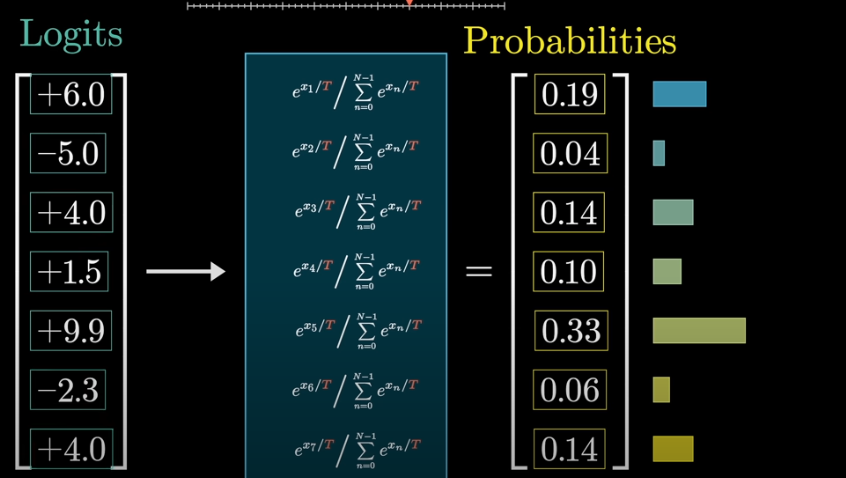

In [2]:
from IPython.display import Image, display
display(Image(filename='assets/9-logits.png', width=500, height=500))

### Attention Mechanism


- `Single-Head Attention`: computes attention for a **specific part of the input** (one "head")
- `Multi-Head Attention`: combines **multiple single-head attentions**, allowing the model to capture different aspects of the input simultaneously
- `Attention Block`: contains the multi-head attention mechanism along with other layers like feedforward networks and normalization layers
    - typically repeated multiple times in a transformer architecture
- `Transformer model`: stacks multiple attention blocks together

Hierarchy: 

1. Transformer Model
    - Composed of multiple **Attention Blocks**
        - each Attention Block contains:
            - a **Multi-Head Attention** layer
                - each Multi-Head Attention layer consists of several **Single-Head Attention** mechanisms
            - additional layers like Feedforward Networks and Add & Norm layers



Before using embeddings as Query, Key or Value vectors, they undergo a linear transformation
<br><br>
*Q = W_q x embedding*
<br><br>
*K = W_k x embedding*
<br><br>
*V = W_v x embedding*
<br><br>
where W_q, W_k, W_v are different learned weight matrices

- `Query`: represents the "question"/"focus" that the single-head attention is asking about the current word
    - ex. if the current word is *"cat"* in the sentence "The cat sat on the mat", the Query for "cat" might be asking, "Which other words (Keys) in this sentence should I focus on to understand *cat* better?"
<br><br>
- `Key`: serves as a criterion/reference point against which the Query is compared to determine the relevance of each word
    - **helps the model understand which other words are related or important to the current word  by evaluating how simialr they are to the Query**
    - ex. in the sentence "the cat sat on the mat", the Key for *"sat"* might contain info that represents the action or verb aspect of the sentence. 
        - the Query for "cat" might compare itself to this Key to determine that "sat" is relevant to understanding the action associated with "cat"
<br><br>
- `Attention Score`: tells us how relevant each word is 
    - i.e. value that represents how much focus (or attention) one word (Query) should give to another word in the sequence (Key)
        - computed by comparing the **Query** vector of the current word with the **Key** vectors of all other words (including itself) in the sequence
    - score indicates relevance/importance to each word in the current word
    <br><br>
    - calculated as: the **dot product between the Query and Key vectors**
        - **higher dot product: Key is more "relevant" to Query**
            - thus would receive more attention 
<br><br>
- `Value`: vector that holds the actual info that will be passed along the next layer of the network if a word is deemed relevant based on the attention scores
    - after computing the attention scores, these scores are used to weigh the Values
        - **the weighted sum of these Values is then used as the output for the current word**
    <br>
    - continuing with the sentence "The cat sat on the mat", if "sat" (Key) is deemed important for "cat" (Query), **the Value associated with "sat" will contribute significantly to the final representation of "cat"**
        - this helps the model understand that "cat" is related to the action of "sitting"
    - essentially answer: *IF a word is relevant to adjusting the meaning of something, what exactly should be added to the embedding of that something else, in order to reflect this?*



- `Masking`: when later tokens in the input sequence are purposefully ommitted (masked) from contributing to attention weights of earlier words. Otherwise, they could "give" away the answer for what comes next, during the training process when each word of the input is predicted as part of the training


- `Context window`: the range/scope of the input sequence that a head can attend to
    - the head's dimension determines how much of the embedding it can process (i.e. the span of input data that its considering at any given time)